# 1. EJERCICIO SOBRE LA BÚSQUEDA ITERATIVA DE  ÓPTIMOS (6.5 puntos)

## EJERCICIO.1.1:  1 punto.
 Implementar el algoritmo de gradiente descendente.

### Explicación Teórica

El algoritmo de **Gradiente Descendiente** es una técnica de optimización iterativa general, que alcanza un _óptimo local_, hacia una dirección decreciente. 

Se basa en el principio del _gradiente_ de una función que nos indica la dirección de **máximo** cambio de una función. Por ello tenemos que seguir la dirección opuesta.

Uno de los requisitos que tenemos que cumplir es 
que la función debe de ser diferenciable y convexa, tal que:
\begin{equation} 
f:Ω \subset \mathbb{R}^n → ℝ 
\end{equation} 
Es decir, permite encontrar $ w \in \textrm{ argmin }_{w \in \Omega} f(w) $ 

Además, tenemos que lidiar con una magnitud de hiper-parámetros que analizaremos a continuación sobre su importancia y efecto sobre el algoritmo. Pero primeramente quizás convendría visualizar como funciona:


### Explicación Visual del algoritmo:

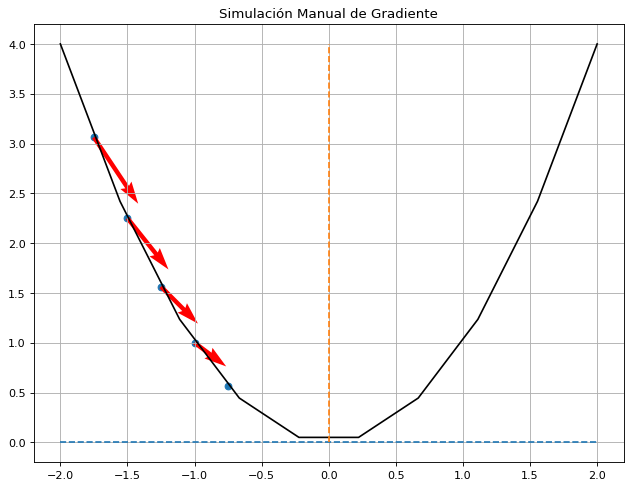

In [ ]:
# Importamos las librerías que necesitamos para dibujar
import matplotlib.pyplot as plt 
import numpy as np

# Generamos unos valores entre -2 y 2
valores = np.linspace(-2,2,10)
# Definimos una parábola
func = lambda x: x**2

# Dibujamos la parábola y remarcamos el mínimo
plt.figure(dpi=80,figsize=(8,6))
plt.plot(valores,func(valores),color='black')
plt.tight_layout()
plt.grid()
plt.plot(valores,valores*0,'--')
plt.plot(valores*0,np.linspace(0,4,10),'--')
plt.title("Simulación Manual de Gradiente")

puntos = np.arange(-1.75,-0.5,0.25)
# Dibujamos unos puntos sobre uno de los lados hacia el centro
# Con esto, sabemos que la función es monotona.
plt.scatter(puntos,func(puntos))
# Simulamos el gradiente manualmente; 
for i in range(len(puntos)-1):
  plt.quiver(puntos[i],func(puntos[i]),-puntos[i+1],-func(puntos[i+1]),scale=20-2*i,color='red')  

### Definición Matemática

Matemáticamente el gradiente, para unos "pesos" $w$ se define como sigue:
\begin{equation}
w_{t+1} \; = \; w_t - ŋ \nabla f(w_t)
\end{equation}
Usualmente estos valores se inician a cero. El $ \eta $ que multiplica al gradiente de la función hace alusión a lo que denominamos factor/tasa de aprendizaje. Este en pocas palabras nos indica la magnitud del salto que nos proporciona el gradiente.

Si la tasa de aprendizaje es demasiado pequeña tardará muchas iteraciones en converger; Por otro lado, si la tasa es demasiado alta, es posible que se salte el mínimo global y termine en otro lado, posiblemente incluso más alto que antes. Podría incluso provocar que el algoritmo diverja.

El pseudo-código indica que buscaremos reducir el valor de la función hasta un "$ E_{in}(w) \le \epsilon $" . Sin embargo, nada nos asegura que encontramos ese valor ya que la función puede quedarse atascada en un óptimo local. Para evitarlo lo que haremos es imponer un límite superior de iteraciones.

E igual, que se define para unos "pesos" también se puede definir para los puntos de una función $f(x,y)$

### **Implementación Gradiente**

In [ ]:
# Definimos una semilla para que los resultados siempre sean los mismos
np.random.seed(140521)

'''
Parameters
------------
w_ini : np.array()
  Esto equivale a los "pesos"/"puntos" iniciales de la función a minimizar
lr : float
  Este es la tasa de aprendizaje del algoritmo
grad_fun : derivada en función de x e y. 
  Es un puntero a la función derivada del gradiente, esta en ultima instancia 
  recibe dos parametros (x,y) y devuelve un vector [x',y']
fun : función a minimizar
epsilon : float 
  Error mínimo aproximado al que queremos llegar
max_iters : int 
  Límite superior de iteraciones para evitar ciclar indefinidamente
no_max : boolean
  En caso de que no queramos un límite superior de iteraciones
no_err : boolean
  En caso de que no queramos un límite de error a conseguir
save_steps : boolean
  En caso de que queramos guardar todos los "pesos"/"puntos" que vamos obteniendo
show_results: boolean
  Imprime los resultados que vamos obteniendo a lo largo de las iteraciones

Returns
------------------
w : np.array()
  Puntos actualizados ó Vector de Puntos que se han ido actualizando según "save_steps"
'''
def gradient_descent(w_ini, lr, grad_fun, fun, epsilon, max_iters,no_max=False,no_err=False,save_steps=False, show_results=False):
    iterations = 0
    # Hacemos una copy por valor de los 'pesos'
    w = w_new = w_ini.copy()
    if save_steps:
      w = np.expand_dims(w_new, axis=0)
    while((no_max or iterations < max_iters) and (no_err or fun(w_ini[0],w_ini[1]) > epsilon)):
      # A cada 'peso' tenemos que restarle la derivada de la 'función objetivo'.
      w_new = w_ini - lr*(grad_fun(w_ini[0],w_ini[1]))

      if(show_results and iterations % (max_iters*0.3)==0):
        print('Valor de los pesos: ' , w_new )
        print('Valor del error ' , fun(w_new[0],w_new[1]))

      w_ini = w_new
      if save_steps:
        w_new = np.expand_dims(w_new,axis=0)
        w = np.append(w,w_new, axis=0)
      else: 
        w = w_new
      iterations += 1
    
    return w, iterations+1 

## EJERCICIO.1.2: 2 puntos
 Considerar la función $E(u, v) = (uve^{(−u^2−v^2)})^2$. Usar gradiente descendente para
encontrar un mınimo de esta función, comenzando desde el punto $(u, v) = (0.5, -0.5)$ y usando
una tasa de aprendizaje $\lambda = 0.1$.\
**a**) Calcular analíticamente y mostrar la expresión del gradiente de la función $E(u, v)$.\
**b**) ¿Cuántas iteraciones tarda el algoritmo en obtener por primera vez un valor de $E(u, v)$ inferior a $10^{−8}$.\
**c**) ¿En qué coordenadas $(u, v)$ se alcanzó por primera vez un valor igual o menor que $10^{-8}$ en el apartado anterior


### **Implementación $E(u,v) = (uve^{(-u^2-v^2)})^2$**

El paso previo a la implementación del algoritmo para resolver este problema de optimización de función sería calculando la derivada de la función respecto cada uno de sus parámetros.
\begin{equation}
\frac{\nabla E(u,v)}{du} = v^2(2u-4u^3)e^{-2u^2-2v^2} \\
\frac{\nabla E(u,v)}{dv} = u^2(2v-4v^3)e^{-2u^2-2v^2}
\end{equation}
Luego para cada iteración tenemos que actualizar todos los pesos síncronamente.

In [ ]:
# Definimos la función tal como sigue:
def E(u,v):
    return (u*v*np.exp(-u**2-v**2))**2
   
# Derivada parcial de E con respecto a u
def dEu(u,v):
    return v*2*(2*u-4*u**3)*np.exp(-2*u**2-2*v**2)
    
# Derivada parcial de E con respecto a v
def dEv(u,v):
    return u*2*(2*v-4*v**3)*np.exp(-2*u**2-2*v**2)

# Gradiente de E
def gradE(u,v):
    return np.array([dEu(u,v), dEv(u,v)])

In [ ]:
# Definimos los datos de partida
eta = 0.1  # Tasa de Aprendizaje
maxIter = 10000000000 # Límite superior de iteraciones
error2get = 1e-8 # Error a obtener 
initial_point = np.array([0.5,-0.5])  # Puntos inicial de partida
# Utilizamos la función anteriormente definida con no_max=True, ya que queremos alcanzar el Err estimado
E_w, E_it = gradient_descent(initial_point,eta,gradE,E,error2get,maxIter,no_max=True,save_steps=True)
# Cuando hablo de error, es lo mismo que el valor de la función en ese punto dado.

print ('############################### ')
print ('#### Resultados obtenidos ####')
print ('Numero de iteraciones: ', E_it)
print ('Función en el punto de partida: ', E(0.5, -0.5))
print ('Función en el punto final: ', E(E_w[-1][0],E_w[-1][1]))
print ('Coordenadas obtenidas: (', E_w[-1][0], ', ', E_w[-1][1] ,')')
print ('############################### ')

############################### 
#### Resultados obtenidos ####
Numero de iteraciones:  74
Función en el punto de partida:  0.022992465073215146
Función en el punto final:  8.871648630725752e-09
Coordenadas obtenidas: ( 0.669920264344317 ,  -0.00022023557153485844 )
############################### 


### Visualización y Análisis

Text(0.5, 0.92, 'Punto Inicial(Red) vs Final(Black)')

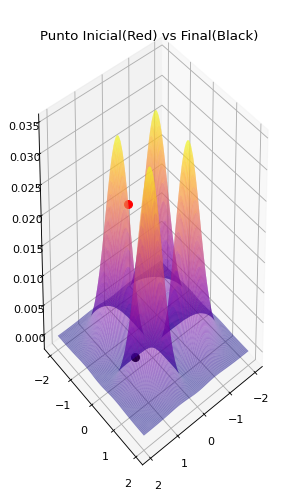

In [ ]:
# Vamos a dibujar la función para visualizar el resultado
x_ran = np.linspace(-2,2,100)
y_ran = np.linspace(-2,2,100)
EX, EY = np.meshgrid(x_ran, y_ran)
EZ = E(EX, EY) 
fig = plt.figure(figsize=(10,8),dpi=80)
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot_surface(EX, EY, EZ, edgecolor='none', rstride=1,
                              cstride=1, cmap='plasma', alpha=.5)
ax.scatter(E_w[0][0], E_w[0][1], E(E_w[0][0], E_w[0][1]), 'r*',color='red',alpha=1,s=50)
ax.scatter(E_w[-1][0], E_w[-1][1], E(E_w[-1][0], E_w[-1][1]), 'r*',color='black',alpha=1,s=50)
ax.view_init(30,50)
ax.set_title("Punto Inicial(Red) vs Final(Black)")

Al parecer con tan solo 74 iteraciones hemos podido minimizar nuestra función, pasando del punto rojo al punto negro como se demuestra en la figura anterior. Obtenido un valor mucho menor que error esperado.

Para ello hemos realizado lo definido anteriormente. Hemos seguido el la dirección opuesta a la de mayor cambio de la función. Así, en vez de subir hasta el pico "amarillo" hemos bajado hasta un mínimo en "azul".

## EJERCICIO.1.3: 2 puntos
Considerar ahora la función $f(x, y) = x^2 + 2y^2 + 2sin(2\pi x)sin(\pi y)$ \

**a**) Usar gradiente descendente para minimizar esta funcin. Usar como punto inicial $(x_0 =
-1, y_0 = 1)$, (tasa de aprendizaje $\eta$ = 0,01 y un máximo de 50 iteraciones. Generar un
gráfico de cómo desciende el valor de la función con las iteraciones. Repetir el experimento pero usando $\eta$ = 0,1, comentar las diferencias y su dependencia de $\eta$. \
**b**) Obtener el valor mínimo y los valores de las variables $(x, y)$ en donde se alcanzan cuando
el punto de inicio se fija en: (-0.5, -0.5), (1, 1), (2.1,-2.1), (-3, 3), (-2, 2). Generar una
tabla con los valores obtenidos. Comentar la dependencia del punto inicial.

### Función de Dibujado Proporcionada (Modificada)

In [ ]:
# Función proporcionada por el profesor para dibujar el gradiente.
'''
La función dibujará dos vistas, una normal y otra desde arriba de una superficie en 3D.
Dónde sobre ella se dibujará los pasos que hemos tomado para encontrar el mínimo.

Parameters
-----------
rng_val : float 
  Límite del intervalo de puntos generar como rango para los valores de la función
fun : puntero a función
  Función a dibujar
ws : np.array()
  Vector de "pesos"/"puntos" a dibujar.
colormap : string
  Mapa de color a utilizar
title_fig : string 
  Título de la figura.
ax : np.array([None])
  Si ya tenemos una gráfica sobre la cuál sobreescribir un nuevo conjunto de puntos o no

Returns
----------
ax : np.array(plt_subplots)
  Devuelve un array de tamaño 2 con los dos subplots de plt utilizados.
'''
def display_figure(rng_val, fun, ws, colormap, title_fig,ax=np.array([None])):
    # https://jakevdp.github.io/PythonDataScienceHandbook/05.12-three-dimensional-plotting.html
    from mpl_toolkits.mplot3d import Axes3D
    x = np.linspace(-rng_val, rng_val, 50)
    y = np.linspace(-rng_val, rng_val, 50)
    X, Y = np.meshgrid(x, y)
    Z = fun(X, Y) 
    fig = plt.figure(figsize=(8,6),dpi=80)
    first_draw = False
    if ax.any() == None:
      ax = np.array([fig.add_subplot(1,2,1,projection='3d'),fig.add_subplot(1,2,2,projection='3d')],dtype=object)
      first_draw = True
    ws = np.asarray(ws)
    min_point = np.array([ws[-1,0],ws[-1,1]])
    min_point_ = min_point[:, np.newaxis]
    for i in range(0,2):
      if len(ws)>0:
        if(first_draw):
          ax[i].plot_surface(X, Y, Z, edgecolor='none', rstride=1,
                              cstride=1, cmap=colormap, alpha=.5)
        ax[i].plot(ws[:-1,0], ws[:-1,1], fun(ws[:-1,0], ws[:-1,1]), 'r*', markersize=5)
        ax[i].plot(min_point_[0], min_point_[1], fun(min_point_[0], min_point_[1]), 'r*', color='black', markersize=10)
        ax[i].set_xlabel('u')
        ax[i].set_ylabel('v')
        ax[i].set_zlabel('E(u,v)')
        ax[i].view_init(30+(60*i),5)

    if len(title_fig)>0:
        fig.suptitle(title_fig, fontsize=16)
    fig.tight_layout()
    plt.subplots_adjust(wspace=0,hspace=0)
    return ax

### Apartado a), Ejercicio 1.3

#### **Implementación $f(x,y) = x^2 + 2y^2 +2sin(2\pi x)sin(\pi y)$** 

Otra vez volvemos a calcular la derivada de la función respecto a cada parámetro que posee:
\begin{equation}
\frac{\nabla F(x,y)}{dx} = 4\pi sin(\pi y)cos(2\pi x) + 2x \\
\frac{\nabla F(x,y)}{dy} = 2\pi sin(2\pi x)cos(\pi y) + 4y
\end{equation}
Y realizamos un esquema similar al ejercicio anterior.

In [ ]:
from matplotlib import cm, rc
# Definimos la función de partida 
F = lambda x,y: x**2 + 2*y**2 + 2*np.sin(2*np.pi*x)*np.sin(np.pi*y)

# Definimos su derivada respecto a x:
dFx = lambda x,y: 4*np.pi*np.sin(np.pi*y)*np.cos(2*np.pi*x) + 2*x

# Definimos su derivada respecto a y:
dFy = lambda x,y: 2*np.pi*np.sin(2*np.pi*x)*np.cos(np.pi*y) + 4*y

# Definimos el gradiente como en el ejercicio anterior
def gradF(u,v):
  return np.array([dFx(u,v),dFy(u,v)])

In [ ]:
# Datos de partida 
eta = 0.01  # Tasa de aprendizaje 
maxIter = 50 # Nuevo límite de iteraciones
error2get = 1e-8 # Error aproximado
initial_point = np.array([-1,1]) # Punto de partida
# Llamamos al algoritmo del ejercicio 1
Low_w, Low_it = gradient_descent(initial_point,eta,gradF,F,error2get,maxIter,no_err=True,save_steps=True)
print ("###########################################")
print ("### Resultados Obtenidos para 0.01 ###")
print("Valor Inicial: ",F(Low_w[0,0],Low_w[0,1]))
print("Coordenadas finales obtenidos: ", Low_w[-1])
print("Valor Final: ", F(Low_w[-1,0],Low_w[-1,1]))
print ("###########################################")

###########################################
### Resultados Obtenidos para 0.01 ###
Valor Inicial:  3.0
Coordenadas finales obtenidos:  [-1.21775644  0.41341775]
Valor Final:  -0.062308909884795094
###########################################


array([<matplotlib.axes._subplots.Axes3DSubplot object at 0x7f9623946a50>,
      dtype=object)

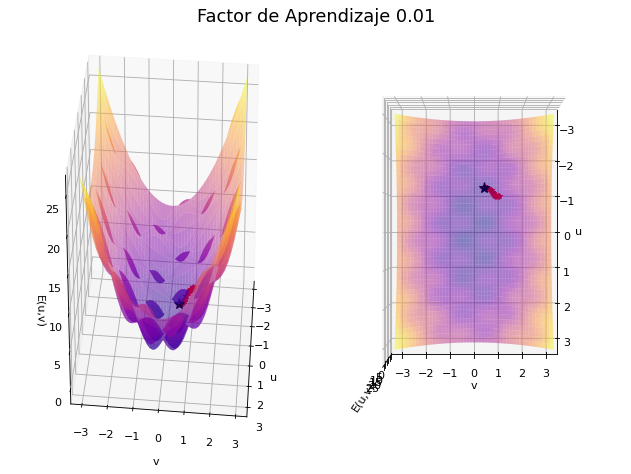

In [ ]:
# Llamamos a la función para visualizar los pasos tomados
display_figure(3,F,Low_w,'plasma','Factor de Aprendizaje 0.01')

Vemos que la evolución que sigue la función es en dirección a un mínimo correctamente, en concreto, se dirige al más cercano de forma controlada. Antes de analizar esta evolución, veremos la diferencia que nace en comparación a una tasa de aprendizaje mayor:

In [ ]:
# Nuevos Datos de partida
eta = 0.1  # Nueva tasa de aprendizaje 
maxIter = 50 # Mismo límite de iteraciones 
error2get = 1e-8 # Error aproximado. 
initial_point = np.array([-1,1]) # Mismo punto de partida
# Llamamos a la misma función del ejercicio anterior 
High_w, High_it = gradient_descent(initial_point,eta,gradF,F,error2get,maxIter,no_err=True,save_steps=True)
print ("###########################################")
print ("### Resultados Obtenidos para 0.1 ###")
print("Valor Inicial: ",F(High_w[0,0],High_w[0,1]))
print("Coordenadas finales obtenidos: ", High_w[-1])
print("Valor Final: ", F(High_w[-1,0],High_w[-1,1]))
print ("###########################################")

###########################################
### Resultados Obtenidos para 0.1 ###
Valor Inicial:  3.0
Coordenadas finales obtenidos:  [-0.29887301 -0.01148968]
Valor Final:  0.15838887749355962
###########################################


Primeramente destacar el hecho de que hayamos alcanzado un mínimo peor que la ejecución anterior. Veremos que es lo que ha ocurrido:

array([<matplotlib.axes._subplots.Axes3DSubplot object at 0x7f96234257d0>,
      dtype=object)

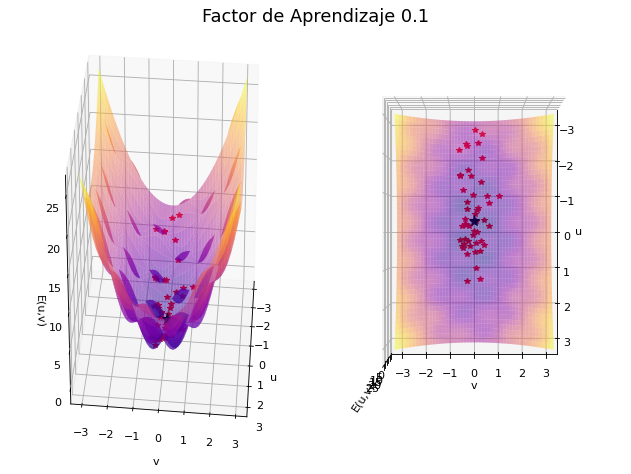

In [ ]:
# Volvemos a visualiar lo ocurrido con la función de dibujado
display_figure(3,F,High_w,'plasma','Factor de Aprendizaje 0.1')

El algoritmo parece haber evolucionado de manera más drástica, explorando con mucha más amplitud la función; Sin embargo, ha terminado por caer en un mínimo peor.

#### Pequeño análisis de imágenes
Con este ejercicio hemos podido analizar empirícamente lo que hemos definido al principio de este documento respecto a la teoría del gradiente y sus parámetros. Es decir,
la tasa de aprendizaje influye en gran medida en como se desarrolla el algoritmo. Con 0.01 hemos dado "saltos" de menor magnitud evitando dispersar los valores e yendo hacia un mínimo de forma segura. Mientras que con una tasa de 0.1 hemos realizado movimientos mucho más bruscos y arriesgando encontrar un mínimo peor; Incluso se puede observar lo que aparente ser incrementos de valores. (No sigue un camino monotono decreciente)

Observemos mejor el cambio de valor de la función conforme evoluciona los algoritmos con las siguientes gráficas:

<Figure size 640x480 with 0 Axes>

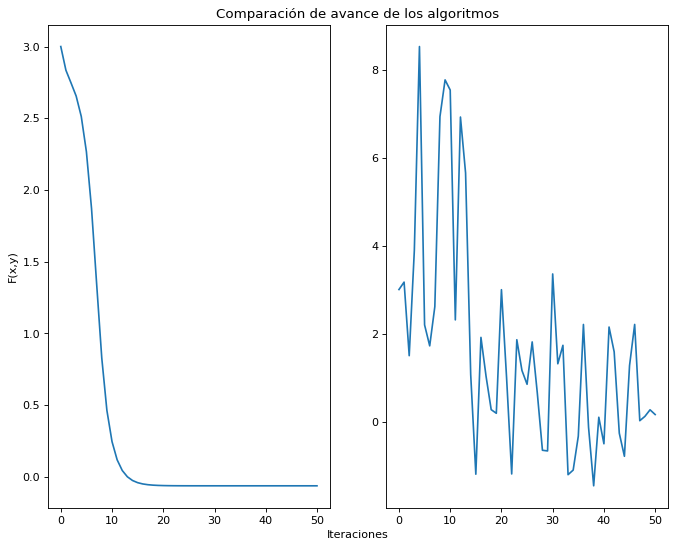

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=80)
err_lw = []
err_hw = []
for val in Low_w:
  err_lw.append(F(val[0],val[1]))
for val in High_w:
  err_hw.append(F(val[0],val[1]))

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=80)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.title('Comparación de avance de los algoritmos')
plt.xlabel('Iteraciones')
plt.ylabel('F(x,y)')
ax[0].plot(np.arange(0,Low_it,1),err_lw)
ax[1].plot(np.arange(0,High_it,1),err_hw)

Text(0, 0.5, 'F(x,y)')

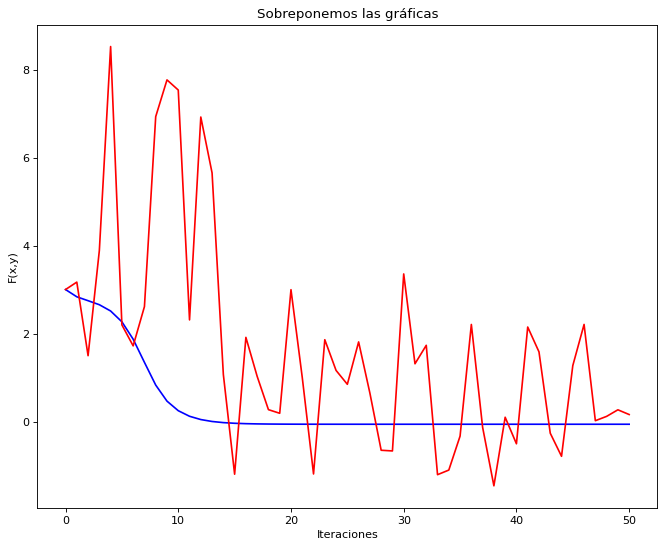

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8),dpi=80)
ax.plot(np.arange(0,Low_it,1),err_lw,color='blue')
ax.plot(np.arange(0,High_it,1),err_hw,color='red')
plt.title('Sobreponemos las gráficas')
plt.xlabel('Iteraciones')
plt.ylabel('F(x,y)')

La diferencia es evidente empiricamente y acorde con la teoría. \\
En conclusión, con una tasa elevada aumentamos la estocásticidad pero "perdemos" un poco el control sobre la evolución del algoritmo.

### Apartado b), Ejercicio 1.3 Múltiples puntos de partida

Para mejor entender el comportamiento del algoritmo respecto a los mínimos locales, primeramente vamos a dibujar los diferentes caminos que tomará el algoritmo según los puntos de partida.

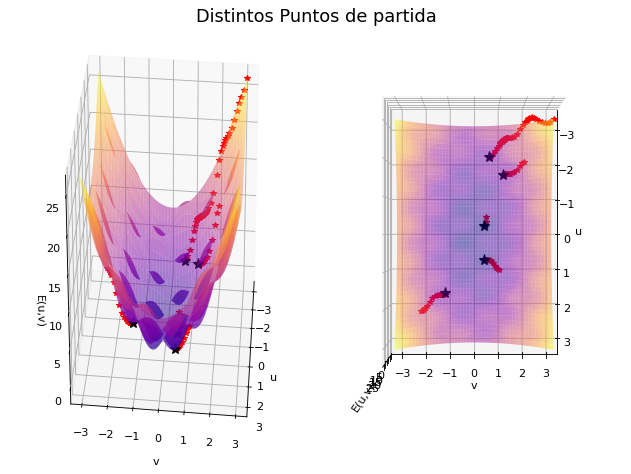

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apartado B, diferentes puntos de partida
eta = 0.01  # Ponemos la tasa apropiada
maxIter = 50 # Imponemos el máximo número de iteraciones
error2get = 1e-8 # Valor cuál buscamos
initial_point = np.array([[-0.5,0.5],[1,1],[2.1,-2.1],[-3,3],[-2,2]])
ax = np.array([[None],[None]])
mul_w = []
for point in initial_point:
  w_temp, it = gradient_descent(point,eta,gradF,F,error2get,maxIter,save_steps=True,no_err=True)
  mul_w.append(w_temp)
  ax = display_figure(3,F,w_temp,'plasma','Distintos Puntos de partida',ax)

mul_w = np.array(mul_w)

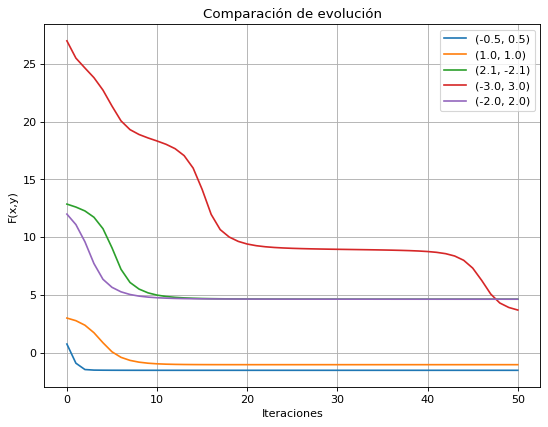

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=80)
for val in mul_w:
  err = []
  for a in val: 
    err.append(F(a[0],a[1]))
  lab = "({}, {})".format(val[0][0],val[0][1])
  ax.plot(np.arange(0,len(err),1),err,label=lab)

plt.title('Comparación de evolución')
plt.xlabel('Iteraciones')
plt.ylabel('F(x,y)')
plt.grid()
plt.legend()

Viendo el valor (-3.0, 3.0), línea roja, podemos entender que la tasa de aprendizaje es algo pequeña ya que empieza a estabilizarse alrededor de 20 iteraciones; Luego vemos que los valores rápidamente se "atascan" en algún mínimo. Cabe destacar el punto (-0.5, 0.5), línea azul, que se estabiliza casi al instante dando a entender que ya es de por sí un punto óptimo (Local; La línea naranja similar).

In [ ]:
# Ahora para el dibujado de la tabla importamos panda.
import pandas as pd

# Establecemos las columnas iniciales
df = pd.DataFrame(initial_point,
                  columns=['X Inicial','Y Inicial'])

first_w = []
min_w = []
min_x = []
min_y = []
# Calculamos los valores de w
for val in mul_w:
  first_w.append(F(val[0][0],val[0][1]))
  min_x.append(val[-1][0])
  min_y.append(val[-1][1])
  min_w.append(F(val[-1][0],val[-1][1]))

df['Valor Inicial'] = first_w
df['X Final'] = min_x
df['Y Final'] = min_y
df['Valor Final'] = min_w

# https://stackoverflow.com/questions/58801176/display-pandas-dataframe-with-larger-font-in-jupyter-notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(df)

,X Inicial,Y Inicial,Valor Inicial,X Final,Y Final,Valor Final
0,-0.5,0.5,0.750,-0.244,0.415,-1.524
1,1.0,1.0,3.000,0.731,0.414,-1.037
2,2.1,-2.1,12.867,1.665,-1.173,4.634
3,-3.0,3.0,27.000,-2.189,0.587,3.694
4,-2.0,2.0,12.000,-1.664,1.171,4.634


Vemos que según el punto de partida hemos encontrado un mínimo diferente. Pero en última instancia hemos podido minimizar el valor final de las variables iniciales. La diferencia recae en el número de iteraciones necesario para alcanzar-lo, algunos casos se "estancaron" en un mínimo con tal solo 10 iteraciones, y en el valor final.

## EJERCICIO.1.4: (1.5 punto)
 ¿Cuál sería su conclusión sobre la verdadera dificultad de encontrar el mínimo
global de una función arbitraria?

Podemos determinar con las muestras la teoría de _"óptimo local"_ viendo que dependiendo de los valores de $w$ podemos encontrar una solución mejor o peor. Además, la rápidez o eficacia con la que encontramos ese valor óptimo depende de nuestra tasa de aprendizaje que determina la magnitud de cambios o pasos que tomamos.

Con todo esto vemos que hay que tener en cuenta el tipo de problema que intentamos resolver y qué estamos dispuestos de arriesgar ("Trade-Off"). Y que claramente no podemos asumir que el algoritmo nos dará la mejor solución absoluta, el óptimo global, sino que apenas una "muy buena" respecto al punto de partida (En funciones complejas).

Es como si estuvieramos haciendo una búsqueda a "ciegas" sobre la función, dando por hecho que el cambio de pendiente de la función en un punto arbitrario será aquél camino que nos lleve a la solución global. Una manera de intentar escapar de esa suposición es con aumentar la tasa de aprendizaje para "explorar" más a cambio de la seguridad, y/o otras variaciones como veremos a continuación. En última instancia, no podemos asegurar que encontraremos el óptimo global en funciones complejas.

Quizás una buena manera de explorar las posibilidades es probar con varios puntos de partidas si disponemos de esa oportunidad y/o conocemos la función.

# 2 EJERCICIO SOBRE REGRESIÓN LINEAL (5.5 puntos)
Este ejercicio ajusta modelos de regresión a vectores de características extraídos a partir de
imágenes de dígitos manuscritos. En particular, se extraen dos características concretas que miden el valor medio del nivel de gris y la simetría del dígito respecto de su eje vertical. Solo se seleccionarán
para este ejercicio las imágenes de los números 1 y 5.

## Función de lectura de los archivos

In [ ]:
label5 = 1
label1 = -1
# Función para leer los datos.
def readData(file_x, file_y):
	# Leemos los ficheros	
	datax = np.load(file_x)
	datay = np.load(file_y)
	y = []
	x = []	
	# Solo guardamos los datos cuya clase sea la 1 o la 5
	for i in range(0,datay.size):
		if datay[i] == 5 or datay[i] == 1:
			if datay[i] == 5:
				y.append(label5)
			else:
				y.append(label1)
			x.append(np.array([1, datax[i][0], datax[i][1]]))
			
	x = np.array(x, np.float64)
	y = np.array(y, np.float64)
	
	return x, y

## EJERCICIO.2.1:  2.5 puntos
 Estimar un modelo de regresión lineal, a partir de los datos proporcionados por
los vectores de características dados, usando tanto el algoritmo de la pseudo-inversa como el
gradiente descendente estocástico (SGD). Las etiquetas serán $\{-1,1\}$, una por cada vector de
cada uno de los números. Pintar las soluciones obtenidas junto con los datos usados en el
ajuste. Valorar la bondad del resultado usando $E_{in}$ y $E_{out}$ (para $E_{out}$ calcular las predicciones
usando los datos del fichero de test).

### Definición de Funciones Ejercicio 2.1

Ahora utilizaremos el gradiente para optimizar una función que denota el error de clasificación, en nuestro caso, utilizaremos el error cuadrático. (Es como calcular la distancia de nuestra predicción hacia la solución}
\begin{equation}
E_{in} = \sum_{n=1}^{N} (h(x_n) - y_n)^2 \textrm{ donde,}  \\
h(x_n) = wx_n \textrm{ También se podría representar de forma matricial.} \\ \textrm{ El gradiente respecto a los pesos que vamos a utilizar sería: }
\frac{\nabla E_{in}}{dw_j} = \frac{2}{N} x_{j}(xw -y)
\end{equation}
Se verá esto con más detalle en el apartado teoríco.

In [ ]:
import matplotlib
# Funcion para calcular el error
def Err(x,y,w):
  return np.sum((((x@w)-y)**2))/len(x)

# Gradiente del error obtenido
def gradErr(x,y,w):
  y = y[:, np.newaxis]
  err = x.T @ ((x@w) - y)
  return (2*err)/(len(x))

### Gradiente Descendente Estocástico

#### Definición Teórica

Una alternativa, o variación, del gradiente descendente estudiado en los ejercicios anteriores es el SGD. La idea general es que selecciona un trozo de la muestra, de tamaño generalmente como potencia de 2 (32,516), es decir, siendo es conjunto M << N para N el tamaño de la muestra total. (Puede incluso actualizarse para cada ejemplo, M=1, pero utilizaremos batches de 32). 

Con esto conseguimos añadir cierta aleatoriedad al descenso del gradiente, dificultando así el estancamiento. El problema de esta versión suele ser su lentitud, ya que necesita de muchas iteraciones. Por ello es necesario tener cuidado en la implementación y utilizaremos la variación de los lotes disjuntos.

La representación matemática es la siguiente:
\begin{equation}
w_j = w_j - η \sum_{n \in batch} x_{nj}(h(x_n)-y_n) \\
\textrm{ Dónde, }
h(x) = w_0 +w_1x_1 + ... + w_nx_n = \sum_{i=0}^N w_i  x_i
\end{equation}

Cabe destacar que al usar el Gradiente Descendiente Estocástico en funciones no convexas la evidencia empiríca demuestra muy buenos resultados. Lo que multiplica a la tasa de aprendizaje, en el sumatorio, es la derivada del error cuadrático visto anteriormente en la definición de las funciones para este apartado.

#### **Implementación Gradiente Estocástico**

He optado por omitir la restricción de terminación por el valor obtenido de la función en un momento dado según los nuevos pesos calculados por que como sabemos el error puede variar en cada iteración sobre los lotes, y podría darse el caso que se adaptara muy bien a un lote en concreto sin que en realidad hubiese aprendido algo realmente relevante. Además como veremos a continuación el cuello de botella de esta función por alguna razón está en la función que calculaba el error. Todo esto se ve más claramente al continuar el análisis del algoritmo:

In [ ]:
# He utilizado esta librería para agilizar el proceso de desorganización de los batches
from sklearn.utils import shuffle
'''
La función sgd implementa el gradiente estocástico, es decir, divide la entrada
en batches de tamaño determinado y entrena sobre estos de forma desorganizada; 
Una iteración sobre el conjunto completo de los datos de entrada es una época.
Parameters
---------------
** Apenas definiré los nuevos respectos al gradiente:
batch_size = int 
  Tamaño del subconjunto de entrada que cogeremos

Returns
--------------
w : np.array
  Nuevos pesos o conjunto de pesos que se han ido obteniendo
iteraciones : int
  Número total de iteraciones que hemos ejecutado; Debería coincidir con max_iters
'''
def sgd(x,y,w_ini,lr,gradE,fun,epsilon,batch_size=32,max_iters=0,save_steps=False,show_results=False):
  np.random.seed(140521)

  iterations = 0
  w = w_new = w_ini.copy()
  w = w.T
  while(iterations < max_iters):
    shuffled_x, shuffled_y = shuffle(x,y,random_state=0)
    for i in range(0,len(shuffled_y),batch_size):
      batch_x = np.array(shuffled_x[i:i+batch_size])
      batch_x = np.stack(batch_x)
      batch_y = np.array(shuffled_y[i:i+batch_size])
      batch_y = np.stack(batch_y)

      batch_x = np.array(batch_x)    
      batch_y = np.array(batch_y) 

      w_new = w_ini - lr*(gradE(batch_x,batch_y,w_ini))

      w_ini = w_new.copy()
      if((show_results) and iterations % ((max_iters-1)*0.3)==0):
          print('Valor de los pesos: ' , w_new )
          print('Error total: ', fun(x,y,w_new))

      if save_steps:
        w_new = w_new.T
        w = np.append(w,w_new,axis=0)
      else: 
        w = w_new.T
        w = w[-1]

      w_new = w_ini
      iterations += 1
      if(iterations>=max_iters): break;

  return w, iterations

### Función de dibujado de la frontera de decisión

In [ ]:
'''
La función busca dibujar una línea de decisión según los valores pasados sobreescribiendo un
scatter plot realizado sobre los datos de entrada.

Parameters
-------------
** Apenas definiré los nuevos en relación a lo visto anteriormente
x_test : np.array()
  Conjunto de muestra de testeo, disjunta a las muestras de entrenamiento
y_test : np.array()
  Conjunto de etiquetas de testeo, pareja de x_test
xtitle : string 
  Titulo del eje X
ytitle : string
  Titulo del eje y
pred : puntero a funcion
  La idea era permitir pasar la función de la frontra de decisión
'''
def decision_boundary(w,x,y,x_test=np.array([None]),y_test=np.array([None]),xtitle="",ytitle="",pred=None):
  # Tenemos que hacer un mapeado de color 
  colors = ['blue','red']
  colormap = matplotlib.colors.ListedColormap(colors)

  # Creating figure
  Multiple = False
  if(x_test.any()!=None):
    fig, ax = plt.subplots(1,2,figsize=(8,6),dpi=80)
    Multiple = True
  else:
    fig, ax = plt.subplots(1,1,figsize=(8,6),dpi=80)
  # add a big axis, hide frame
  fig.add_subplot(111, frameon=False)
  # hide tick and tick label of the big axis
  plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
  plt.xlabel(xtitle)
  plt.ylabel(ytitle)

  if pred==None:
    pred = lambda x:-(w[0] + w[1]*x)/w[2]

  if(Multiple):
    ax[0].scatter(x[:,1], x[:,2], c = y[:],cmap=colormap)
    ax[0].plot(x[:,1],pred(x[:,1]),color='black')
    ax[0].set_title("Muestra de entreno")

    ax[1].scatter(x_test[:,1], x_test[:,2], c = y_test[:],cmap=colormap)
    ax[1].plot(x_test[:,1],pred(x_test[:,1]),color='black')
    ax[1].set_title("Muestra de testeo")
  else:
    ax.scatter(x[:,1], x[:,2], c = y[:],cmap=colormap)
    ax.plot(x[:,1],pred(x[:,1]),color='black')
    ax.set_title("Muestra de entreno")

  return ax


### Análisis y Ejecución del gradiente estocástico

In [ ]:
# Lectura de los datos de entrenamiento
x, y = readData('X_train.npy', 'y_train.npy')
#x, y = readData('/content/drive/MyDrive/datos/X_train.npy','/content/drive/MyDrive/datos/y_train.npy')
# Lectura de los datos para el test
x_test, y_test = readData('X_test.npy', 'y_test.npy')
#x_test, y_test = readData('/content/drive/MyDrive/datos/X_test.npy','/content/drive/MyDrive/datos/y_test.npy')

# Datos de partida
eta = 0.1 # Nueva tasa de aprendizaje
maxIter = 1200 # Nuevo límite de iteraciones, nota: Valor menor.
error2get = 1e-8 # Error aproximado esperado.
batch_size = 32 # Tamaño de las muestras del conjunto a actualizar por iteración
w = np.zeros((x[0].size,1)) # Vector de pesos

# Ejecutamos todo 
w,it = sgd(x,y,w,eta,gradErr,Err,error2get,batch_size,maxIter,save_steps=True)
print("#######################################")
print ("### Resultados Obtenidos ###")
print ('Bondad del resultado para grad. descendente estocastico:')
print ("Ein: ", Err(x,y,w[-1]))
print ("Eout: ", Err(x_test, y_test, w[-1]))
print ("Pesos finales: ", w[-1])
print ("{} iteraciones para un total de {} batches de tamaño: {} ".format(it,len(x)/batch_size,batch_size))
print ("Total de épocas {}".format(it/(len(x)/batch_size)))
print ("##############################################")

#######################################
### Resultados Obtenidos ###
Bondad del resultado para grad. descendente estocastico:
Ein:  0.08712960710440952
Eout:  0.14796962321097928
Pesos finales:  [-1.16946736 -0.55181727 -0.49212938]
1200 iteraciones para un total de 48.78125 batches de tamaño: 32 
Total de épocas 24.599615631005765
##############################################


Vemos que para un total de 1200 iteraciones, que sobre el conjunto de entrada con batches de 32 equivale a 24.5 épocas, hemos obtenido un error de aproximadamente $0.09$ sobre el conjunto de entrenamiento. 

Además el error para el conjunto de testeo, disjunto al de entrenamiento, equivale a $0.1479$ aproximadamente. Por lo que podemos suponer que no hubo un _"overfitting"_, es decir, hemos aprendido sobre la muestra y hemos logrado un buen mínimo.


In [ ]:
# Verificamos el tiempo de ejecución del método
temp_w = np.zeros((x[0].size,1)) # Vector de pesos
%timeit Err(x,y,temp_w)
%timeit gradErr(x,y,temp_w)
%timeit sgd(x,y,temp_w,eta,gradErr,Err,error2get,batch_size,maxIter,save_steps=True)

100 loops, best of 5: 11.4 ms per loop
10000 loops, best of 5: 46.1 µs per loop
1 loop, best of 5: 300 ms per loop


Increiblemente el cuello de botella de ejecución está sobre la función que calcula el error, posiblemente porque posee alguna que otra operación más compleja computacionalmente como sería el "broadcast" y elevar al cuadrado.

Por lo que al quitar esa restricción de nuestro algoritmo podemos incrementar la velocidad de ejecución en grandes magnitudes, lo que nos será oportuno para uno de los próximos ejercicios de calcular medias.

Para asegurarnos del análisis podemos dibujar la frontera de decisión y verificar:

#### Evidencia gráfica

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9621db6310>,
      dtype=object)

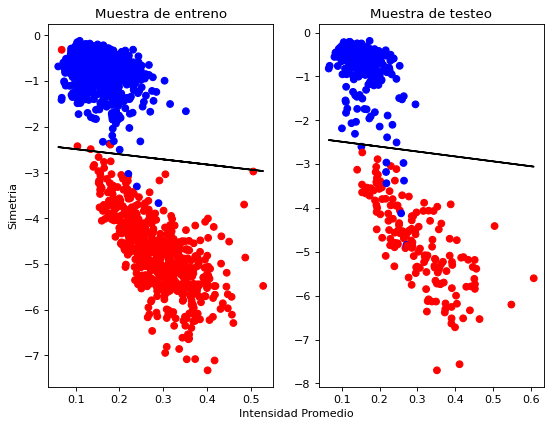

In [ ]:
decision_boundary(w[-1],x,y,x_test,y_test,"Intensidad Promedio", "Simetria")

Vemos claramente que el conjunto de datos es linealmente separable y hemos logrado obtener una frontera de división que divide el subconjunto de datos apropiamente explicando así los resultados obtenidos anteriormente.

### Pseudo Inversa

#### Definición Teórica

Si expresamos el error cuadrático como una expresión matricial, podemos llegar
a la siguiente expresión: 
\begin{equation}
E_{in}(w)=\frac{1}{N} \sum_{n=1}^N (w^tx_n - y_n)^2 \textrm{ pasamos a: } \\
E_{in}(w)= \frac{1}{N}||Xw - y ||^2
\end{equation}
Si cogemos el gradiente de esa función obtenemos la siguiente igualdad:
\begin{equation}
\nabla E_{in}(w) = \frac{2}{N} X^T(Xw - y) = 0 \textrm{ despejamos, } \\
X^TXw = X^T y
\end{equation}
Y ahí es dónde entraría en juego la pseudo inversa.

La pseudoinversa $A^+$ de una matriz $A$ es una generalización de la matriz inversa. El uso es el de computar una solución de _"ajuste óptimo"_ (por cuadrados mínimos) de un sistema de ecuaciones lineales que no posee solución. La fórmula de cálculo de $A^+$ es, siempre que el rango de la matriz sea máximo, es decir, si $ A \in \mathbb{R}^{n \times m} \textrm{ con } rango(A)=m$, el siguiente:
\begin{equation}
A^+ = (A^TA)^{1}A^T \textrm{ donde } A^T \textrm{ es la transpuesta de A} 
\end{equation}
Tal que con ella tenemos la simple igualdad al despejar los pesos $w$:
\begin{equation}
w = X^+y
\end{equation}


#### **Implementación PseudoInversa**

In [ ]:
# Si aseguramos que existe una inversa podríamos usar esta,
# Lo he utilizado para comprobar valores.
def inversa_matrix(x,y):
  return np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)

# Definimos lo que sería el cálculo de la matriz inversa.
# Wronge returned value in svd: https://stackoverflow.com/questions/59228672/having-problems-using-numpy-linalg-svd
def svd(x,y):
  u,d,vt = np.linalg.svd(x,full_matrices=False)
  dd = np.diag(d)
  # X^T = V * D * U^T
  x_T = vt.T @ dd @ u.T
  # We know that U^T * U = I (Identity); We can avoid that
  # X^T * X = V DD V^T
  to_inv = vt.T@dd@dd@vt
  # pseudo = (X^T * X)^-1 * X^T
  inverted = np.linalg.inv(to_inv)
  pseudo = np.dot(inverted,x_T)
  # w = pseudo * y
  return np.dot(pseudo,y)


### Análisis de PseudoInversa

In [ ]:
# Lectura de los datos de entrenamiento
x, y = readData('X_train.npy', 'y_train.npy')
#x, y = readData('/content/drive/MyDrive/datos/X_train.npy','/content/drive/MyDrive/datos/y_train.npy')
# Lectura de los datos para el test
x_test, y_test = readData('X_test.npy', 'y_test.npy')
#x_test, y_test = readData('/content/drive/MyDrive/datos/X_test.npy','/content/drive/MyDrive/datos/y_test.npy')


# Observe que no necesitamos nada más que los datos de entrada.

# Ejecutamos todo 
svd_w = svd(x,y)
print("#######################################")
print ('### Resultados Obtenidos ### ')
print ('Bondad del resultado para grad. descendente estocastico:')
print ("Ein: ", Err(x,y,svd_w))
print ("Eout: ", Err(x_test, y_test, svd_w))
print ("Pesos finales: ", svd_w, " Contra los sgd: ", w[-1])
print ('###########################################')

#######################################
### Resultados Obtenidos ### 
Bondad del resultado para grad. descendente estocastico:
Ein:  0.07918658628900396
Eout:  0.1309538372005258
Pesos finales:  [-1.11588016 -1.24859546 -0.49753165]  Contra los sgd:  [-1.16946736 -0.55181727 -0.49212938]
###########################################


Hemos visto que con apenas una iteración hemos podido asegurar un error dentro de la muestra del orden del $0.08$ tal como el algoritmo del gradiente descendente estocástico. Así podría uno preguntarse si no es más eficiente utilizar este directamente. Veremos a ver su velocidad de ejecución:

In [ ]:
%timeit svd(x,y)

The slowest run took 10.11 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 557 µs per loop


Efectivamente, este método sería mucho más rápido para este problema sin duda alguna. Lo que tendríamos que verificar es si al incrementar el número de iteraciones máximos del algoritmo estocástico podríamos llegar a obtener un resultado de _errores_ dentro y fuera de la muestra equivalente o mejores. 

#### Visualización de los resultados

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9621cb8850>,
      dtype=object)

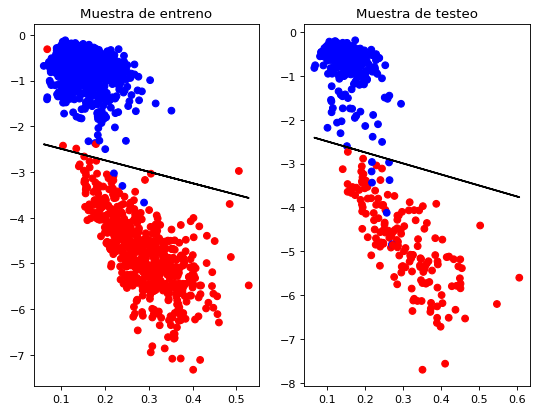

In [ ]:
decision_boundary(svd_w,x,y,x_test,y_test)

Tenemos una solución similar al del algoritmo estocástico, incluso aparenta ser mejor clasificando casos extremos cerca de los perímetros de los grupos. Quizás ahi es dónde obtiene mejores resultados.

### Comparación y Conclusión


Probemos utilizar 50000 iteraciones.

In [ ]:
maxIter = 50000
w = np.zeros((x[0].size,1)) # Vector de pesos
w,it = sgd(x,y,w,eta,gradErr,Err,error2get,batch_size,maxIter,save_steps=True)
print("#######################################")
print ("### Resultados Obtenidos ###")
print ('Bondad del resultado para grad. descendente estocastico:')
print ("Ein: ", Err(x,y,w[-1]))
print ("Eout: ", Err(x_test, y_test, w[-1]))
print ("Pesos finales: ", w[-1])
print ("{} iteraciones para un total de {} batches de tamaño: {} ".format(it,len(x)/batch_size,batch_size))
print ("Total de épocas {}".format(it/(len(x)/batch_size)))
print ("##############################################")

#######################################
### Resultados Obtenidos ###
Bondad del resultado para grad. descendente estocastico:
Ein:  0.08022533171616203
Eout:  0.129286494174684
Pesos finales:  [-1.11380109 -1.18963721 -0.48249157]
50000 iteraciones para un total de 48.78125 batches de tamaño: 32 
Total de épocas 1024.9839846252403
##############################################


Tardando del orden de varias magnitudes superior (11s versus 199$μ$s) al método de la matriz hemos podido asegurar un error similar. Podemos inducir que la convergencia del SGD es mucho más lenta, la pseudo-inversa se adapta mejor a la función y realiza el cómputo más rápidamente. Esto ocurre por que estamos inviertiendo solamente una matriz de tamaño $3\times 3$; Si estuvieramos hablando de una matriz de una dimensión mucho mayor podríamos tener problemas.

La conclusión sobre el OLS es que es una manera analítica de aprender, ya que el $E_{out}(w)$ se mantiene bajo también.

#### Matriz Confusiana

In [ ]:
def getConfusianMatrix(x,y,w):
  neg_right = neg_wrong = pos_wrong = pos_right = 0
  prediction = x*w
  for row , real in zip(prediction,y):
    pred = np.sum(row)
    if pred>=0 and real>=0:
      pos_right += 1
    elif pred>=0 and real<=0:
      pos_wrong += 1
    elif pred<=0 and real<=0:
      neg_right += 1
    elif pred<=0 and real>=0:
      neg_wrong += 1

  frame = {'Positivo':[pos_right,pos_wrong],
           'Negativo': [neg_wrong,neg_right]}  
  df_matrix = pd.DataFrame(frame,index=['Positivo','Negativo'])
  return df_matrix

print("Matrix confusiana de la pseudo inversa")
display(getConfusianMatrix(x,y,svd_w[-1]))

Matrix confusiana de la pseudo inversa


,Positivo,Negativo
Positivo,555,1
Negativo,125,880


In [ ]:
print("Matrix confusiana del SGD")
display(getConfusianMatrix(x,y,w[-1]))

Matrix confusiana del SGD


,Positivo,Negativo
Positivo,549,7
Negativo,3,1002


Sorprendentemente al mirar la matrix confusiana nos hemos deparado que una vez ejecutado el gradiente estocástico con 50.000 iteraciones, aunque a priori parecía haber obtenido un $E_{in}$ similar, este ha tenido un resultado mucho mejor en la clasificación de los datos de entrenamiento.

In [ ]:
print("Matrix confusiana de la pseudo inversa sobre el conjunto de test")
display(getConfusianMatrix(x_test,y_test,svd_w[-1]))

Matrix confusiana de la pseudo inversa sobre el conjunto de test


,Positivo,Negativo
Positivo,160,0
Negativo,40,224


In [ ]:
print("Matrix confusiana del SGD sobre el conjunto de test")
display(getConfusianMatrix(x_test,y_test,w[-1]))

Matrix confusiana del SGD sobre el conjunto de test


,Positivo,Negativo
Positivo,160,0
Negativo,7,257


Increiblemente también sobre la muestra de testeo hemos encontrado que casi clasificamos perfectamente a la muestra con el algoritmo estocástico. Este resultado vendrá dado probablemente por la característica "exploradora" que posee el gradiente estocástico al practicar sobre conjuntos de muestras pequeñas en vez de sobre toda la muestra. Y por ser un método iterativo y no una resolución analítica.

## EJERCICIO.2.2:  3 puntos
 En este apartado exploramos cónmo se transforman los errores Ein y Eout cuando aumentamos la complejidad del modelo lineal usado. Ahora hacemos uso de la función
$simula\_unif (N, 2, size)$ que nos devuelve N coordenadas 2D de puntos uniformemente mues-
treados dentro del cuadrado definido por $[−size, size]\times[−size, size]$. Se debe realizar el siguiente experimento: \
**a**) Generar una muestra de entrenamiento de $N = 1000$ puntos en el cuadrado $X = [−1, 1]\times
[−1, 1]$. Pintar el mapa de puntos 2D.\
**b**) Consideremos la función $f(x_1, x_2) = sign((x_1 − 0,2)^2 + x_2^2 − 0,6)$ que usaremos para
asignar una etiqueta a cada punto de la muestra anterior. Introducimos ruido sobre las
etiquetas cambiando aleatoriamente el signo de un $10\%$ de las mismas. Pintar el mapa
de etiquetas obtenido.\
**c**) Usando como vector de características (1, x1, x2), ajustar un modelo de regresión lineal al conjunto de datos generado y estimar los pesos ${\bf w}$. Estimar el error de ajuste $E_{in}$ usando SGD. \
**d**) Ejecutar todo el experimento definido por (a)-(c) 1000 veces (generamos 1000 muestras
diferentes) y calcular el valor medio de los errores $E_{in}$ de las 1000 muestras.
Generar 1000 puntos nuevos por cada iteración y calcular con ellos el valor de $E_{out}$
en dicha iteración. Calcular el valor medio de $E_{out}$ en todas las iteraciones. \
**e**) Valore qué tan bueno considera que es el ajuste con este modelo lineal a la vista de los
valores medios obtenidos de $E_{in}$ y $E_{out}$.

*   Repetir el mismo experimento anterior pero usando características no lineales. Ahora
usaremos el siguiente vector de características: $\Phi(x) = (1, x_1, x_1^2,x_1x_2, x_2, x_2^2)$. Ajustar el nuevo modelo de regresión lineal y calcular el nuevo vector de pesos $\bf\hat w$. Calcular los errores promedio de $E_{in}$ y $E_{out}$.
*   A la vista de los resultados de los errores promedios $E_{in}$ y $E_{out}$ obtenidos en los dos experimentos, ¿qué modelo considera que es el más adecuado? Justifique la respuesta. 
 

### Funciones Proporcionadas de generación de datos

In [ ]:
# Función plantilla del profesorado generación de puntos
# Pequeña modificación es añadir el termino independiente 1
def simula_unif(N=2, dims=2, size=(0, 1)):
    #np.random.seed(140521)
    m = np.random.uniform(low=size[0], 
                          high=size[1], 
                          size=(N, dims+1))
    m[:,0] = 1
    return m

# Función plantilla del profesorado para las etiquetas
def label_data(x1, x2):
    #np.random.seed(140521)
    y = np.sign((x1-0.2)**2 + x2**2 - 0.6)
    idx = np.random.choice(range(y.shape[0]), size=(int(y.shape[0]*0.1)), replace=True)
    y[idx] *= -1
    
    return y

### Verificamos los datos

Text(0.5, 1.0, 'Etiquetas Generadas 10% noise')

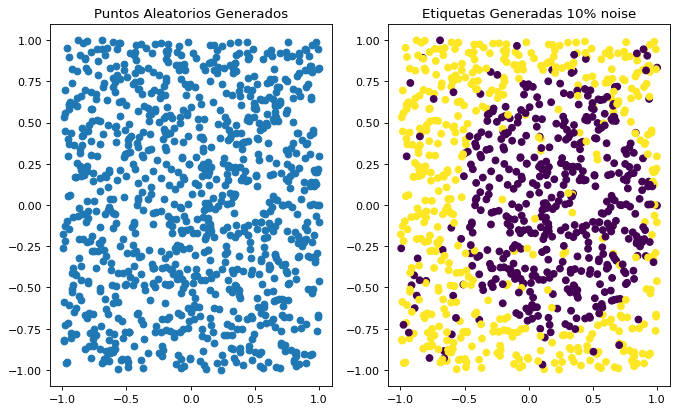

In [ ]:
# Generate data
nonL_x = simula_unif(N=1000, dims=2, size=(-1, 1))
nonL_y = label_data(nonL_x[:, 1], nonL_x[:, 2])
nonL_xT = simula_unif(N=1000, dims=2, size=(-1, 1))
nonL_yT = label_data(nonL_x[:, 1], nonL_x[:, 2])

# Plot data
fig = plt.figure(figsize=(10,6),dpi=80)
ax = fig.add_subplot(1,2,1)
ax.scatter(nonL_x[:,1],nonL_x[:,2])
ax.set_title("Puntos Aleatorios Generados")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(nonL_x[:, 1], nonL_x[:, 2], c=nonL_y)
ax.set_title("Etiquetas Generadas 10% noise")

Vemos que en este ejercicio la información esta distribuida de forma no lineal (_"data snooping"_). Y además posee un ruido del 10% alrededor de la gráfica.

### **Apartado c), Ejercicio 2.2 Modelo Lineal**

In [ ]:
np.random.seed(140521)
# Apartado c, estimar un modelo lineal:
nonL_w = np.zeros((3,1))

# Datos de partida
eta = 0.1 # Tasa de aprendizaje 
maxIter = 200 # Número de iteraciones según diapositiva
error2get = 1e-8 # Error aproximado
batch_size = 32 # Tamaño de los lotes
# Inicializamos los pesos
nonL_w = np.zeros((nonL_x[0].size,1))

# Ejecutamos todo 
nonL_w,it = sgd(nonL_x,nonL_y,nonL_w,eta,gradErr,Err,error2get,batch_size,maxIter,save_steps=True)
print("#######################################")
print ("### Resultados Obtenidos ###")
print ('Bondad del resultado para grad. descendente estocastico:')
print ("Ein: ", Err(nonL_x,nonL_y,nonL_w[-1]))
print ("Eout: ", Err(nonL_xT, nonL_yT, nonL_w[-1]))
print ("Pesos finales: ", nonL_w[-1])
print ("{} iteraciones para un total de {} batches de tamaño: {} ".format(it,len(nonL_x)/batch_size,batch_size))
print ("Total de épocas {}".format(it/(len(nonL_x)/batch_size)))
print ("##############################################")

#######################################
### Resultados Obtenidos ###
Bondad del resultado para grad. descendente estocastico:
Ein:  0.924143369492351
Eout:  1.0874208975431336
Pesos finales:  [ 0.03615193 -0.51796366  0.02505162]
200 iteraciones para un total de 31.25 batches de tamaño: 32 
Total de épocas 6.4
##############################################


Con un módelo lineal, al contrario de los resultados que ibamos obteniendo anteriormente, ahora la tasa de error es la que equivale al $0.93$ de los casos. Eso significa que el modelo lineal no se adapta bien a nuestro conjunto de entrada. Ya que visualmente sabemos que no son linealmente separables. Podemos ver lo que nuestro modelo estima como una buena frontera de decisión:

#### Matriz Confusiana modelo Lineal

In [ ]:
print("Matrix confusiana del modelo Lineal sobre el conjunto de entrenamiento")
display(getConfusianMatrix(nonL_x,nonL_y,nonL_w[-1]))

Matrix confusiana del modelo Lineal sobre el conjunto de entrenamiento


,Positivo,Negativo
Positivo,323,190
Negativo,194,293


Vemos que hemos acertado con la misma probabilidad que si estuvieramos tirando una moneda al aire cada vez que fueramos a clasificar un dato de entrada sobre alguna de las etiquetas proporcionadas.

#### Visualización del modelo lineal

(-1.2, 1.2)

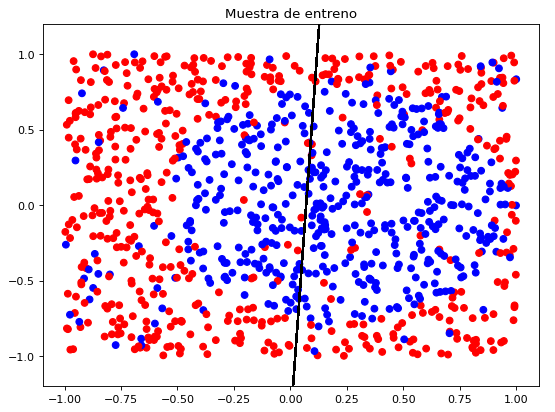

In [ ]:
ax = decision_boundary(nonL_w[-1],nonL_x,nonL_y)
ax.set_ylim([-1.2,1.2])

Es casi anecdótico el intento de separar los datos con esa regla. Probemos ver la media de errores con nuevos conjuntos de datos aleatorios en un total de 1000 iteraciones:

#### Promedio de valores modelo lineal:

In [ ]:
# Datos de Partida
eta = 0.1 # Utilizaremos la misma tasa de aprendizaje
maxIter = 200 # Mantenemos el número de iteraciones 
error2get = 1e-8 # Error aproximado
batch_size = 32 # Mantenemos el tamaño de lote
num_iters = 1000 # Calcularemos 1000 iteraciones sobre el conjunto

# Definimos la función
iterations = 0
Ein_mean = 0
Eout_mean = 0

while(iterations < num_iters ):
  temp_nonX = simula_unif(N=1000, dims=2, size=(-1, 1))
  temp_nonY = label_data(temp_nonX[:, 1], temp_nonX[:, 2])
  temp_nonW = np.zeros((temp_nonX[0].size,1))
  temp_nonW,it = sgd(temp_nonX,temp_nonY,temp_nonW,eta,gradErr,Err,error2get,batch_size,maxIter)
  Ein_mean += Err(temp_nonX,temp_nonY,temp_nonW)
  temp_nonXT = simula_unif(N=1000, dims=2, size=(-1, 1))
  temp_nonYT = label_data(temp_nonX[:, 1], temp_nonX[:, 2])
  Eout_mean += Err(temp_nonXT,temp_nonYT,temp_nonW)
  iterations += 1


Ein_mean = Ein_mean / num_iters
Eout_mean = Eout_mean / num_iters

print("#######################################")
print("### Resultados Obtenidos ### ")
print("La media de error dentro de la muestra: ", Ein_mean)
print("La media de error fuera de la muestra: ", Eout_mean)
print("#######################################")

#######################################
### Resultados Obtenidos ### 
La media de error dentro de la muestra:  0.9323427025321411
La media de error fuera de la muestra:  1.122940754444407
#######################################


Tras 24 segundos de ejecución, hemos obtenido que la media de errores no ha variado para nada para $E_{in}(w)$. Pero si respecto al $E_{out}(w)$ ya que ahora es superior. Asumimos entonces que según evidencia empiríca sabemos que el modelo lineal no es capaz de aprender sobre el conjunto de entrada, es incapaz de clasificar correctamente.

### **Creamos el modelo no-lineal**

In [ ]:
# Transformamos los valores de entrada
def phi(var):
  Lin_x = np.zeros((len(nonL_x),6))
  Lin_x[:,0] = var[:,0]
  Lin_x[:,1] = var[:,1]
  Lin_x[:,2] = var[:,2]
  Lin_x[:,3] = var[:,1]*var[:,2]
  Lin_x[:,4] = var[:,1]**2
  Lin_x[:,5] = var[:,2]**2
  return Lin_x

Lin_x = phi(nonL_x)
Lin_w = np.zeros((6,1))

# Datos de Partida
eta = 0.1
maxIter = 1000
error2get = 1e-8
batch_size = 32

Lin_w,it = sgd(Lin_x,nonL_y,Lin_w,eta,gradErr,Err,error2get,batch_size,maxIter,save_steps=True)
print("#######################################")
print ("### Resultados Obtenidos ###")
print ('Bondad del resultado para grad. descendente estocastico:')
print ("Ein: ", Err(Lin_x,nonL_y,Lin_w[-1]))
print ("Eout: ", Err(phi(nonL_xT), nonL_yT, Lin_w[-1]))
print ("Pesos finales: ", Lin_w[-1])
print ("{} iteraciones para un total de {} batches de tamaño: {} ".format(it,len(Lin_x)/batch_size,batch_size))
print ("Total de épocas {}".format(it/(len(Lin_x)/batch_size)))
print ("##############################################")

#######################################
### Resultados Obtenidos ###
Bondad del resultado para grad. descendente estocastico:
Ein:  0.5835159652877087
Eout:  1.4428723405304837
Pesos finales:  [-0.87097012 -0.48422931 -0.00515741 -0.13223878  1.13821963  1.55824461]
1000 iteraciones para un total de 31.25 batches de tamaño: 32 
Total de épocas 32.0
##############################################


Hemos conseguido obtener un error dentro de la muestra del $0.57$. A priori podría parecer que no hemos sido capaz de aprender, ya que observe que el $E_{out}(w)$ es muy superior al al error dentro de la muestra, por lo que en teoría no hemos podido aprender, si no que apenas hemos podido adaptarnos a la muestra en concreto con la que hemos entrenado. Quizás quedaría más claro si visualizamos la frontera de decisión y la matriz confusiana:

#### Matriz Confusiana modelo no-lineal

In [ ]:
print("Matrix Confusiana del modelo  no-Lineal sobre el conjunto de entrenamiento")
display(getConfusianMatrix(Lin_x,nonL_y,Lin_w[-1]))

Matrix Confusiana del modelo  no-Lineal sobre el conjunto de entrenamiento


,Positivo,Negativo
Positivo,406,107
Negativo,50,437


Vemos que sobre el conjunto de entrenamiento hemos obtenido un valores de clasificación realmente buenos. Una probabilidad de equivocarnos muy baja.

In [ ]:
print("Matrix Confusiana del modelo  no-Lineal sobre el conjunto de testeo")
display(getConfusianMatrix(phi(nonL_xT),nonL_yT,Lin_w[-1]))

Matrix Confusiana del modelo  no-Lineal sobre el conjunto de testeo


,Positivo,Negativo
Positivo,238,293
Negativo,229,240


Vemos que nos hemos equivocado casi igual que el modelo lineal sobre la nuevas muestras generadas para el conjunto de testeo. Es decir, no hemos aprendido a extrapolar sobre el conjunto de entrenamiento un método de clasificación, sino que apenas nos adaptamos a la muestra que teníamos en concreto.

#### Visualización de los resultados

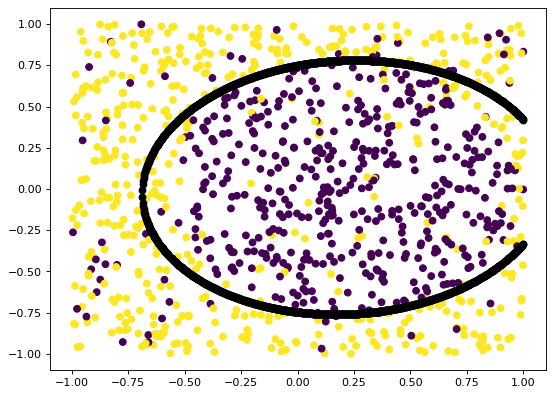

In [ ]:
# w_5x2^2 + w_3x1*x2 + w_2x2 + w_01 + w_1x1 + w_4x1^2 = 0
# a = w_5; b = w_3x1 + w_2; c  = w_0 + w_1x1 + w_4x1^2
# x2 = (-(w_3*x1 + w_2) -/+ sqrt((w_3*x1+w_2)^2 - 4*w_5*(w_0 + w_1x1 + w_4x1^2)))/(2*w_5)
# Al despejar x2 y aplicar la formula tendremos dos casos, el negativo:
def minus_boundary(x,w):
  a = w[5]
  b = w[3]*x+w[2]
  c = w[0] + w[1]*x + w[4]*(x**2)
  var = b**2 - 4*a*c
  var[var <= 0] = None
  return (-b - np.sqrt(var)) / (2*a)
# Y el positivo.
def plus_boundary(x,w):
  a = w[5]
  b = w[3]*x+w[2]
  c = w[0] + w[1]*x + w[4]*(x**2)
  var = b**2 - 4*a*c
  var[var <= 0] = None
  return (-b + np.sqrt(var)) / (2*a)

valores = np.linspace(-1,1,1000)

fig, ax = plt.subplots(1,1,figsize=(8,6),dpi=80)
ax.scatter(nonL_x[:,1],nonL_x[:,2],c=nonL_y[:])
XX, YY = np.meshgrid(valores,valores);
ax.scatter(valores,minus_boundary(valores,Lin_w[-1]),color='black')
ax.scatter(valores,plus_boundary(valores,Lin_w[-1]),color='black')

Ahora sí podemos ver que hemos estimado un buen modelo para el conjunto de datos de entrenamiento, ya que podemos diferenciar las clases claramente utiliazando la frontera. Podemos culpar el error elevado en la muestra al ruido ($10\%$) que tiene nuestras etiquetas.
Estimemos el error promedio en 1000 iteraciones y comparemos:

### Promedio modelo no-lineal

In [ ]:
# Datos de Partida
eta = 0.1 # Utilizaremos la misma tasa de aprendizaje
maxIter = 200 # Mantenemos el número de iteraciones 
error2get = 1e-8 # Error aproximado
batch_size = 32 # Mantenemos el tamaño de lote
num_iters = 1000 # Calcularemos 1000 iteraciones sobre el conjunto

# Definimos la función
iterations = 0
Ein_mean2 = 0
Eout_mean2 = 0

while(iterations < num_iters ):
  temp_nonX = phi(simula_unif(N=1000, dims=2, size=(-1, 1)))
  temp_nonY = label_data(temp_nonX[:, 1], temp_nonX[:, 2])
  temp_nonW = np.zeros((temp_nonX[0].size,1))
  temp_nonW,it = sgd(temp_nonX,temp_nonY,temp_nonW,eta,gradErr,Err,error2get,batch_size,maxIter)
  Ein_mean2 += Err(temp_nonX,temp_nonY,temp_nonW)
  temp_nonXT = phi(simula_unif(N=1000, dims=2, size=(-1, 1)))
  temp_nonYT = label_data(temp_nonX[:, 1], temp_nonX[:, 2])
  Eout_mean2 += Err(temp_nonXT,temp_nonYT,temp_nonW)
  iterations += 1


Ein_mean2 = Ein_mean2 / num_iters
Eout_mean2 = Eout_mean2 / num_iters

print("#######################################")
print("### Resultados Obtenidos ### ")
print("La media de error dentro de la muestra: ", Ein_mean2)
print("La media de error fuera de la muestra: ", Eout_mean2)
print("#######################################")

#######################################
### Resultados Obtenidos ### 
La media de error dentro de la muestra:  0.5965344240296975
La media de error fuera de la muestra:  1.442553988380811
#######################################


Vemos que hemos obtenido una mejora del $69\%$ respecto al error del modelo lineal contra el no-lineal de promedio dentro de la muestra $E_{in}(w)$. 
Sin embargo, nuestra media $E_{out}(w)$ se ha disparado. Al parecer no hemos terminado de aprender sobre los valores si no que hemos acabado haciendo _"overfitting"_ y sobre ajustando sobre el conjunto de entreno y no siendo capaz de generalizar. ($28\%$ peor)

Podemos ver que existe un _"Trade-off"_ que realizar en este tipo de problemas. En pocas palabras, incrementar la complejidad de nuestro modelo hace que se adapte mejor a nuestro conjunto de entrada, llevado al extremo podría ser incluso perfectamente adaptado a ella, pero con ello no termina por aprender apenas características si no también del ruído que hay en los datos. Con ello perdemos capacidad de generalización.

# **BONUS** (2 puntos) 
**El BONUS solo se tendrá en cuenta si se ha obtenido al menos el 75 % de los puntos de la parte obligatoria**

Implementar el algoritmo de minimizaciónn de Newton y aplicarlo a la función $f(x, y)$ dada en el Ejercicio 1.3. Desarrolle los mismos experimentos usando los mismos puntos de inicio.
Generar un gráfico de cómo desciende el valor de la función con las iteraciones. Extraer conclusiones sobre las conductas de los algoritmos comparando la curva de decrecimiento de la función calculada en el apartado anterior y la correspondiente obtenida con gradiente descendente

## Definición teórica

En análisis numérico, el método de Newton (conocido también como el método de Newton-Raphson o el método de Newton-Fourier) es un algoritmo para encontrar aproximaciones de los ceros o raíces de una función real. También puede ser usado para encontrar el máximo o mínimo de una función, encontrando los ceros de su primera derivada.

El método es un abierto, en el sentido de que no está garantizada su convergencia global. la única manera de alcanzar la convergencia es seleccioanr un valor incial lo suficientemente cercano a la raíz buscada. (Se verá a continuación). Si la función presenta múltiples puntos de inflexión o pendientes grandes en el entorno de la raíz entonces las probabilidades de que el algoritmo diverja aumentan (También vistos en la ejecución del ejercicio).

En pocas palabras, el método calcula iterativamente la tangente en este punto dado. La abscisa en el origen de dicha recta será, según el método, una mejor aproximación de la raíz que el valor anterior. 
\begin{equation}
f:[a,b] → \mathbb{R} \textrm{ una función derivable en [a,b], } \\
x_{t+1} = x_t - \frac{f'(x_k)}{f''(x_k)} \textrm{ donde, }\\
f'(x_k) \textrm{ es la derivada de la función}
f''(x_k) \textrm{ es la segunda derivada de la función}
\end{equation}
El método de Newton usa información de la curvatura, a través de la segunda derivada para tomar el camino más directo al óptimo


## Definimos la función y sus dos derivadas

\begin{array}
\text{F}(x,y) = x^2 + 2y^2 +2sin(2\pi x)sin(\pi y) \text{ donde el gradiente,} \\
\frac{\nabla F(x,y)}{dx} = 4\pi sin(\pi y)cos(2\pi x) + 2x \text{ que lo denomiremos F' tal que,}\\
\frac{\nabla F'(x,y)}{dx} = 4\pi sin(\pi y)(-sin(2\pi x)2\pi +2 
\text{ y para el segundo parámetro será:} \\
\frac{\nabla F(x,y)}{dy} = 2\pi sin(2\pi x)cos(\pi y) + 4y \text{ tal que sigue, }\\
\frac{\nabla F'(x,y)}{dy} = 2\pi sin(2\pi x)(-sin(\pi y)\pi + 4 
\end{array}

In [ ]:
# Definimos la función de partida 
F = lambda x,y: x**2 + 2*y**2 + 2*np.sin(2*np.pi*x)*np.sin(np.pi*y)

# Definimos su derivada respecto a x:
dFx = lambda x,y: 4*np.pi*np.sin(np.pi*y)*np.cos(2*np.pi*x) + 2*x
d2Fx = lambda x,y: 4*np.pi*np.sin(np.pi*y)*(-np.sin(2*np.pi*x)*2*np.pi) + 2

# Definimos su derivada respecto a y:
dFy = lambda x,y: 2*np.pi*np.sin(2*np.pi*x)*np.cos(np.pi*y) + 4*y
d2Fy = lambda x,y: 2*np.pi*np.sin(2*np.pi*x)*(-np.sin(np.pi*y)*np.pi) + 4

def gradF(u,v):
  return np.array([dFx(u,v),dFy(u,v)])

def grad2F(u,v):
  return np.array([d2Fx(u,v),d2Fy(u,v)])

## **Implementamos la Hessiana**

In [ ]:
'''
A diferencia de los algoritmos anteriores solamente está el hecho de pasar la segunda derivada
'''
def Hessian(w_ini, lr, d1fun, d2fun, fun, epsilon, max_iters,no_max=False,save_steps=False, no_err=False,show_results=False):
  iterations = 0
    # Hacemos una copy por valor de los 'pesos'
  w = w_new = w_ini.copy()
  if save_steps:
    w = np.expand_dims(w_new, axis=0)
  while((no_max or iterations < max_iters) and (no_err or fun(w_ini[0],w_ini[1]) > epsilon)):
      # A cada 'peso' tenemos que restarle la derivada de la 'función objetivo'.
    w_new = w_ini - lr * (d1fun(w_ini[0],w_ini[1]))/d2fun(w_ini[0],w_ini[1])

    if(show_results and iterations % (max_iters*0.3)==0):
      print('Valor de los pesos: ' , w_new )
      print('Valor del error ' , fun(w_new[0],w_new[1]))

    w_ini = w_new
    if save_steps:
      w_new = np.expand_dims(w_new,axis=0)
      w = np.append(w,w_new, axis=0)
    else: 
      w = w_new
    iterations += 1
    
  return w, iterations   

## Probamos en todos los puntos de partida

Probamos en la lista de puntos $\{(-0.5,0.5),\;(1,1),\;(2.1,-2.1),\;(-3,3),\;(-2,2)\}$


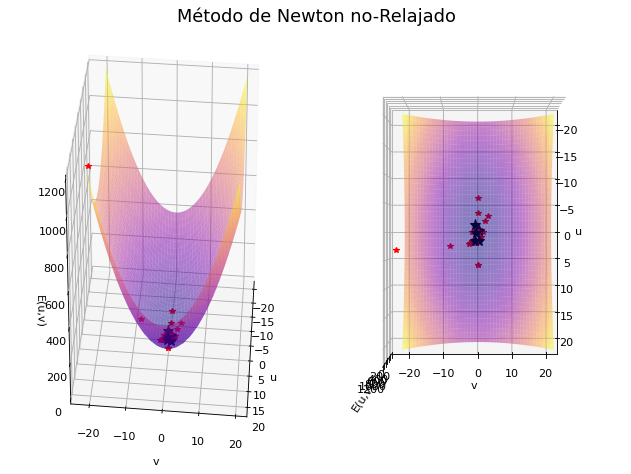

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apartado B, diferentes puntos de partida
eta = 1  # Estamos utilizando el método de Newton no-Relajado
maxIter = 50 # Probamos con menos iteraciones que SGD
error2get = 1e-8 # Error aproximado 
initial_point = np.array([[-0.5,0.5],[1,1],[2.1,-2.1],[-3,3],[-2,2]])
ax = np.array([[None],[None]])
nonR_w = []
for point in initial_point:
  w_temp, it = Hessian(point,eta,gradF,grad2F,F,error2get,maxIter,no_err=True,save_steps=True)
  nonR_w.append(w_temp)
  ax = display_figure(20,F,w_temp,'plasma','Método de Newton no-Relajado',ax)

Al no haber tenido en cuenta los valores que toma la segunda derivada hemos tenido un pequeño salto de valor como se observa (_outlier_). Esto es una de las características que tenemos que tener en cuenta cuando tratamos con el método de Newton. (Igual que saber de antemano si la función es positiva definida). 

Quitando eso, todos los puntos parecen haber convergido a un mínimo relativamente rápido. Además todo esto con apenas 50 iteraciones. Para ver si podemos obviar los saltos repentinos podríamos probar verificar las variación del método que utiliza un factor de aprendizaje denominado Newton Relajado.

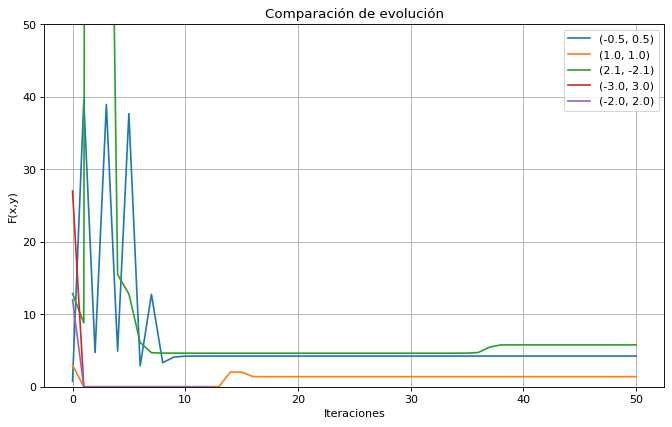

In [ ]:
plt.figure(dpi=80,figsize=(10,6))
for val in nonR_w:
  err = []
  for a in val: 
    err.append(F(a[0],a[1]))
  lab = "({}, {})".format(val[0][0],val[0][1])
  plt.plot(np.arange(0,len(err),1),err,label=lab)

plt.title('Comparación de evolución')
plt.xlabel('Iteraciones')
plt.ylabel('F(x,y)')
plt.ylim((0,50))
plt.grid()
plt.legend()


Vemos que con tal solo 10 iteraciones hemos convergido a un mínimo, con excepción del caso aparte del punto (2.1,-2.1) que quizás estaba al borde de una curva en la función (punto de inflexión). Cosa que probablemente no pasaría con el método relajado como veremos a continuación. Sin embargo, el caso (1.0,1.0) ha tenido una pequeña subida de valor posiblemente por un cambio de signo en la curva de la función.

## Probamos con Newton-Relajado

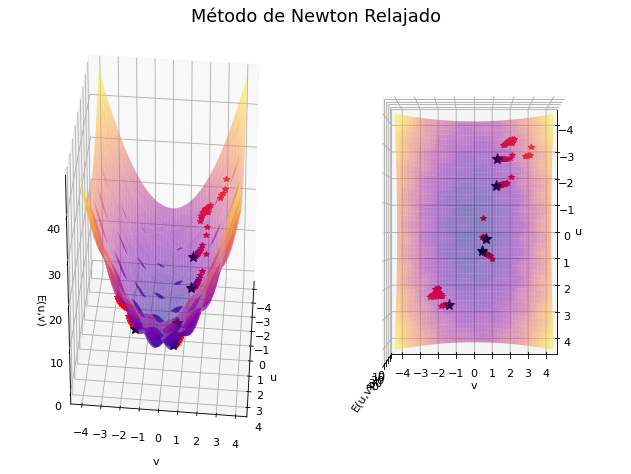

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Datos de partida
eta = 0.1  # Probemos con este valor de aprendizaje
maxIter = 50 # Mantenemos el número de iteraciones
error2get = 1e-8 # Error aproximado
initial_point = np.array([[-0.5,0.5],[1,1],[2.1,-2.1],[-3,3],[-2,2]])
ax = np.array([[None],[None]])
rel1_w = []
for point in initial_point:
  w_temp, it = Hessian(point,eta,gradF,grad2F,F,error2get,maxIter,no_err=True,save_steps=True)
  rel1_w.append(w_temp)
  ax = display_figure(4,F,w_temp,'plasma','Método de Newton Relajado',ax)

Hemos resuelto el problema de los _"outliers"_. Aunque no aparanta haber terminado de convergir, podemos entonces probar incrementar el número de iteraciones máximas para ver hasta dónde podemos llegar.

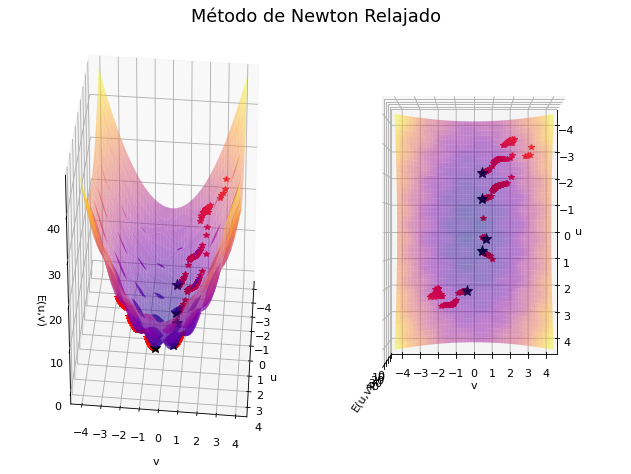

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
eta = 0.1 
maxIter = 5000
error2get = 1e-8
initial_point = np.array([[-0.5,0.5],[1,1],[2.1,-2.1],[-3,3],[-2,2]])
ax = np.array([[None],[None]])
rel2_w = []
for point in initial_point:
  w_temp, it = Hessian(point,eta,gradF,grad2F,F,error2get,maxIter,no_err=True,save_steps=True)
  rel2_w.append(w_temp)
  ax = display_figure(4,F,w_temp,'plasma','Método de Newton Relajado',ax)

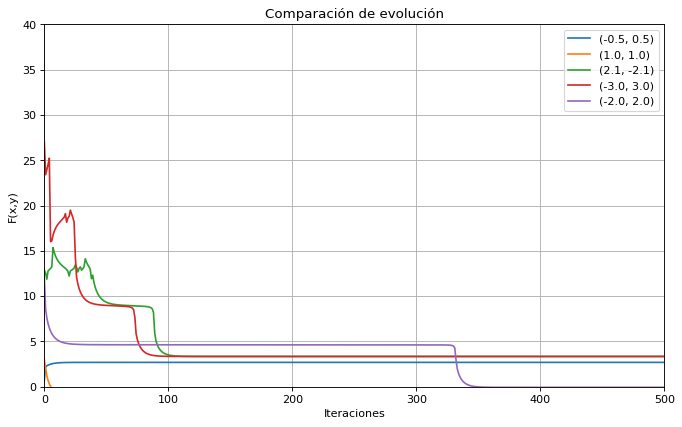

In [ ]:
plt.figure(dpi=80,figsize=(10,6))
for val in rel2_w:
  err = []
  for a in val: 
    err.append(F(a[0],a[1]))
  lab = "({}, {})".format(val[0][0],val[0][1])
  plt.plot(np.arange(0,len(err),1),err,label=lab)

plt.title('Comparación de evolución')
plt.xlabel('Iteraciones')
plt.ylabel('F(x,y)')
plt.ylim((0,40))
plt.xlim((0,500))
plt.grid()
plt.legend()

Hemos obtenido resultados mejores que el anterior, pero no aparenta haber obtenido mejores que el original (Pero tienen una evolución más estable). Lo destacable es ver como el punto morado (-2.0,2.0) encuentra un óptimo mejor en la iteración número 300. En general, al relajar la función necesitamos emplear un número mayor de iteraciones. Veremos los resultados en una tabla:

## Analisemos los resultados:

In [ ]:
df = pd.DataFrame(initial_point,
                  columns=['X Inicial','Y Inicial'])

first_w = []
min_w = []
min_x = []
min_y = []
for val in nonR_w:
  first_w.append(F(val[0][0],val[0][1]))
  min_x.append(val[-1][0])
  min_y.append(val[-1][1])
  min_w.append(F(val[-1][0],val[-1][1]))

df['Valor Inicial'] = first_w
df['X Final'] = min_x
df['Y Final'] = min_y
df['Valor Final'] = min_w

df = df.style.set_caption("Método de Newtom no-Relajado")
# https://stackoverflow.com/questions/58801176/display-pandas-dataframe-with-larger-font-in-jupyter-notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)

display(df)

,X Inicial,Y Inicial,Valor Inicial,X Final,Y Final,Valor Final
0,-0.500,0.500,0.750,-1.286,-0.637,4.237
1,1.000,1.000,3.000,1.704,0.412,1.399
2,2.100,-2.100,12.867,1.801,-0.642,5.780
3,-3.000,3.000,27.000,-0.244,0.415,-1.524
4,-2.000,2.000,12.000,0.244,-0.415,-1.524


Si recordamos las tablas del ejercicio 1.3, vemos que hemos obtenido resultados realmente mejores en los casos (3,4). Sin embargo, parece que hemos alcanzado un mínimo local en los casos (0,1,2). Podemos probar realizar un zoom en estos casos:

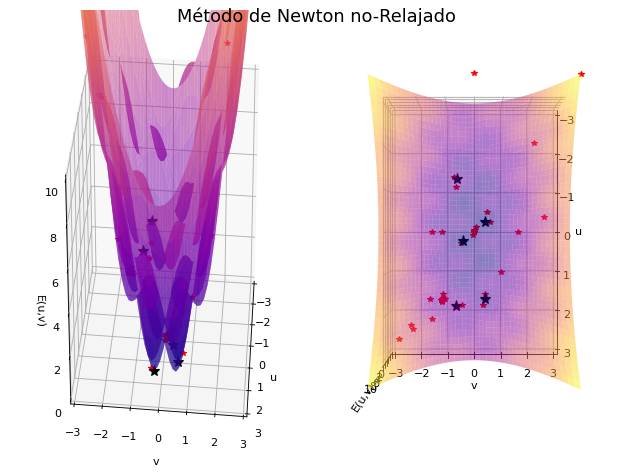

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
eta = 1  #Estamos hablando de Newton-No-Relajado
maxIter = 50
error2get = 1e-8
#initial_point = np.array([[-0.5,0.5],[2.1,-2.1]])
initial_point = np.array([[-0.5,0.5],[1,1],[2.1,-2.1],[-3,3],[-2,2]])
ax = np.array([[None],[None]])
nonR2_w = []
for point in initial_point:
  w_temp, it = Hessian(point,eta,gradF,grad2F,F,error2get,maxIter,no_err=True,save_steps=True)
  nonR2_w.append(w_temp)
  ax = display_figure(3,F,w_temp,'plasma','Método de Newton no-Relajado',ax)
  ax[0].set_zlim([0,10])
  ax[0].set_xlim([-3,3])
  ax[0].set_ylim([-3,3])
  ax[1].set_zlim([0,10])
  ax[1].set_xlim([-3,3])
  ax[1].set_ylim([-3,3])

En la figura a la izquierda se puede observar que hemos obtenido un mínimo local en lugar de la raíz global. Resultado de lo discutido en el apartado de teoría. Quizás encontremos mejores resultados con el método relajado:

## **Probamos los casos especiales Newton-Relajado.**

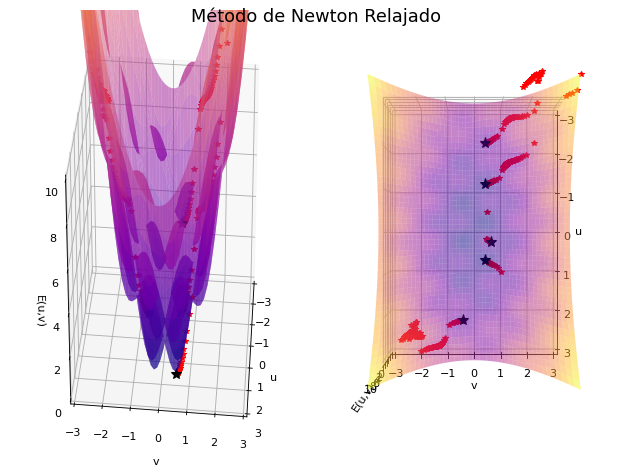

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
eta = 0.1  #Estamos hablando de Newton-No-Relajado
maxIter = 5000
error2get = 1e-8
#initial_point = np.array([[-0.5,0.5],[2.1,-2.1]])
initial_point = np.array([[-0.5,0.5],[1,1],[2.1,-2.1],[-3,3],[-2,2]])
ax = np.array([[None],[None]])
rel3_w = []
for point in initial_point:
  w_temp, it = Hessian(point,eta,gradF,grad2F,F,error2get,maxIter,no_err=True,save_steps=True)
  rel3_w.append(w_temp)
  ax = display_figure(3,F,w_temp,'plasma','Método de Newton Relajado',ax)
  ax[0].set_zlim([0,10])
  ax[0].set_xlim([-3,3])
  ax[0].set_ylim([-3,3])
  ax[1].set_zlim([0,10])
  ax[1].set_xlim([-3,3])
  ax[1].set_ylim([-3,3])

In [ ]:
df = pd.DataFrame(initial_point,
                  columns=['X Inicial','Y Inicial'])

first_w = []
min_w = []
min_x = []
min_y = []
for val in rel3_w:
  first_w.append(F(val[0][0],val[0][1]))
  min_x.append(val[-1][0])
  min_y.append(val[-1][1])
  min_w.append(F(val[-1][0],val[-1][1]))

df['Valor Inicial'] = first_w
df['X Final'] = min_x
df['Y Final'] = min_y
df['Valor Final'] = min_w

df = df.style.set_caption("Método de Newtom Relajado")
# https://stackoverflow.com/questions/58801176/display-pandas-dataframe-with-larger-font-in-jupyter-notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)

display(df)

,X Inicial,Y Inicial,Valor Inicial,X Final,Y Final,Valor Final
0,-0.50,0.50,0.75,0.26,0.63,2.69
1,1.00,1.00,3.00,0.73,0.41,-1.04
2,2.10,-2.10,12.87,2.19,-0.41,3.35
3,-3.00,3.00,27.00,-2.19,0.41,3.35
4,-2.00,2.00,12.00,-1.22,0.41,-0.06


No hemos obtenido un resultado mejor en ningún caso en general, pero sí de mediana (La media es relativamente similar). Otra vez nos encontramos con una situación dónde habría que realizar un _"Trade-off"_. Si queremos minimizar todos los valores, los posibles casos, o obtener un mínimo global. Habría también que verificar la complejidad computacional. 

In [ ]:
eta = 1  #Estamos hablando de Newton-No-Relajado
maxIter = 50
error2get = 1e-8
initial_point = np.array([-0.5,0.5])
%timeit Hessian(initial_point,eta,gradF,grad2F,F,error2get,maxIter,no_err=True,save_steps=True)
eta = 0.1 # Estamos hablando de Newton-Relajado
maxIter = 5000
%timeit Hessian(initial_point,eta,gradF,grad2F,F,error2get,maxIter,no_err=True,save_steps=True)

1000 loops, best of 5: 1.84 ms per loop
1 loop, best of 5: 164 ms per loop


Vemos una diferencia de 1.84 ms para 50 iteraciones a 197 ms para 5000. Quizás 
podríamos intentar establecer un término medio. Pero a priori lo observado es que rápidamente podemos obtener valores muy buenos para la mayoría de los casos, y si queremos asegurar el mejor resultado globalmente quizás convendría utilizar el método relajado y esperar un poco más.